## 제주도 교통량 데이터와 제주도 날씨 데이터를 합쳐서 날씨와 속도의 관계를 예측해보자!
- 날씨 데이터는 기온, 강수량, 풍속을 이용한다.
- 기온과 속도의 관계, 강수량과 속도의 관계, 풍속과 속도의 관계를 파악하고 시각화한다.
- 이후 세가지 변수 중에서 속도와 가장 관계가 깊은 것을 찾는 것이 목표이다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
jeju = pd.read_csv('../BDA/CSV/jeju_traffic.tsv', sep = '\t')

In [3]:
jeju

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,...,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,...,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999994,TRAIN_0999994,20220214,월,11,1,106,지방도1112호선,0,0,60.0,...,0,송당입구,33.478605,126.783057,없음,덕천입구,33.494684,126.806104,없음,51.0
999995,TRAIN_0999995,20211019,화,16,2,107,중앙로,0,0,60.0,...,0,김약국,33.247607,126.561943,없음,한남투자,33.252712,126.561124,없음,16.0
999996,TRAIN_0999996,20211217,금,9,3,106,지방도1132호선,0,0,70.0,...,3,용흥교(동측),33.250624,126.489733,없음,강정교,33.250604,126.489259,없음,53.0
999997,TRAIN_0999997,20220118,화,4,2,103,일반국도16호선,0,0,80.0,...,0,상창교차로,33.280963,126.356788,없음,상창육교,33.280115,126.361832,없음,82.0


In [4]:
jeju.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999999 entries, 0 to 999998
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     999999 non-null  object 
 1   base_date              999999 non-null  int64  
 2   day_of_week            999999 non-null  object 
 3   base_hour              999999 non-null  int64  
 4   lane_count             999999 non-null  int64  
 5   road_rating            999999 non-null  int64  
 6   road_name              999999 non-null  object 
 7   multi_linked           999999 non-null  int64  
 8   connect_code           999999 non-null  int64  
 9   maximum_speed_limit    999999 non-null  float64
 10  vehicle_restricted     999999 non-null  float64
 11  weight_restricted      999999 non-null  float64
 12  height_restricted      999999 non-null  float64
 13  road_type              999999 non-null  int64  
 14  start_node_name        999999 non-nu

In [5]:
rain = pd.read_csv('../BDA/CSV/jeju_rain.csv', encoding='cp949') #강수량 데이터
wind = pd.read_csv('../BDA/CSV/jeju_wind.csv',encoding='cp949')  #풍속 데이터
temp = pd.read_csv('../BDA/CSV/jeju_temp.csv', encoding='cp949') #기온 데이터

In [13]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   일시          730 non-null    object 
 1   평균일강수량(mm)  730 non-null    float64
 2   최다일강수량(mm)  408 non-null    float64
dtypes: float64(2), object(1)
memory usage: 17.2+ KB


In [14]:
wind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   일시         730 non-null    object 
 1   평균풍속(m/s)  730 non-null    float64
 2   최대풍속(m/s)  730 non-null    float64
dtypes: float64(2), object(1)
memory usage: 17.2+ KB


In [15]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   일시         730 non-null    object 
 1   평균기온(℃)    730 non-null    float64
 2   평균최고기온(℃)  730 non-null    float64
 3   최고기온(℃)    730 non-null    float64
 4   평균최저기온(℃)  730 non-null    float64
 5   최저기온(℃)    730 non-null    float64
dtypes: float64(5), object(1)
memory usage: 34.3+ KB


In [28]:
rain['일시'] = pd.to_datetime(rain['일시'])#시계열 데이터로 바꿔주기 위하여 '일시'컬럼의 유형을 바꿔준다.
rain

,일시,평균일강수량(mm),최다일강수량(mm)
0,2022-12-31,0.0,NaN
1,2022-12-30,0.0,NaN
2,2022-12-29,0.0,NaN
3,2022-12-28,0.0,0.0
4,2022-12-27,0.0,NaN
...,...,...,...
725,2021-01-05,0.0,0.0
726,2021-01-04,0.0,NaN
727,2021-01-03,0.0,NaN
728,2021-01-02,0.0,0.0


In [30]:
temp['일시'] = pd.to_datetime(temp['일시'])#시계열 데이터로 바꿔주기 위하여 '일시'컬럼의 유형을 바꿔준다.

temp

,일시,평균기온(℃),평균최고기온(℃),최고기온(℃),평균최저기온(℃),최저기온(℃)
0,2022-12-31,6.1,9.7,11.2,3.2,-1.0
1,2022-12-30,6.4,9.0,10.1,4.1,2.0
2,2022-12-29,5.7,8.0,9.1,4.0,2.1
3,2022-12-28,6.5,9.2,11.3,4.8,3.7
4,2022-12-27,6.6,8.8,11.2,4.9,3.6
...,...,...,...,...,...,...
725,2021-01-05,5.7,8.9,10.3,2.8,1.2
726,2021-01-04,6.0,9.6,10.8,2.1,-0.6
727,2021-01-03,4.4,6.6,9.1,2.3,1.0
728,2021-01-02,5.7,8.9,10.2,2.4,0.8


In [31]:
wind['일시'] = pd.to_datetime(wind['일시'])#시계열 데이터로 바꿔주기 위하여 '일시'컬럼의 유형을 바꿔준다.

wind

,일시,평균풍속(m/s),최대풍속(m/s)
0,2022-12-31,4.3,13.2
1,2022-12-30,3.9,12.2
2,2022-12-29,4.0,12.9
3,2022-12-28,4.2,12.1
4,2022-12-27,4.0,13.2
...,...,...,...
725,2021-01-05,4.2,13.6
726,2021-01-04,2.5,7.8
727,2021-01-03,2.9,8.1
728,2021-01-02,4.5,14.7


In [32]:
jeju_weather = pd.merge(temp, rain)
jeju_weather

,일시,평균기온(℃),평균최고기온(℃),최고기온(℃),평균최저기온(℃),최저기온(℃),평균일강수량(mm),최다일강수량(mm)
0,2022-12-31,6.1,9.7,11.2,3.2,-1.0,0.0,NaN
1,2022-12-30,6.4,9.0,10.1,4.1,2.0,0.0,NaN
2,2022-12-29,5.7,8.0,9.1,4.0,2.1,0.0,NaN
3,2022-12-28,6.5,9.2,11.3,4.8,3.7,0.0,0.0
4,2022-12-27,6.6,8.8,11.2,4.9,3.6,0.0,NaN
...,...,...,...,...,...,...,...,...
725,2021-01-05,5.7,8.9,10.3,2.8,1.2,0.0,0.0
726,2021-01-04,6.0,9.6,10.8,2.1,-0.6,0.0,NaN
727,2021-01-03,4.4,6.6,9.1,2.3,1.0,0.0,NaN
728,2021-01-02,5.7,8.9,10.2,2.4,0.8,0.0,0.0


In [33]:
weather = pd.merge(jeju_weather,wind) #세개의 데이터를 하나로 합쳐서 날씨 데이터를 만든다.
weather

,일시,평균기온(℃),평균최고기온(℃),최고기온(℃),평균최저기온(℃),최저기온(℃),평균일강수량(mm),최다일강수량(mm),평균풍속(m/s),최대풍속(m/s)
0,2022-12-31,6.1,9.7,11.2,3.2,-1.0,0.0,NaN,4.3,13.2
1,2022-12-30,6.4,9.0,10.1,4.1,2.0,0.0,NaN,3.9,12.2
2,2022-12-29,5.7,8.0,9.1,4.0,2.1,0.0,NaN,4.0,12.9
3,2022-12-28,6.5,9.2,11.3,4.8,3.7,0.0,0.0,4.2,12.1
4,2022-12-27,6.6,8.8,11.2,4.9,3.6,0.0,NaN,4.0,13.2
...,...,...,...,...,...,...,...,...,...,...
725,2021-01-05,5.7,8.9,10.3,2.8,1.2,0.0,0.0,4.2,13.6
726,2021-01-04,6.0,9.6,10.8,2.1,-0.6,0.0,NaN,2.5,7.8
727,2021-01-03,4.4,6.6,9.1,2.3,1.0,0.0,NaN,2.9,8.1
728,2021-01-02,5.7,8.9,10.2,2.4,0.8,0.0,0.0,4.5,14.7


In [20]:
jeju['base_date'] = pd.to_datetime(jeju['base_date'], format = '%Y%m%d') #교통량 데이터의'base_date'컬럼을 날짜형으로 바꿔준다.
jeju

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,2022-06-23,목,17,1,106,지방도1112호선,0,0,60.0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,2022-07-28,목,21,2,103,일반국도11호선,0,0,60.0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,2021-10-10,일,7,2,103,일반국도16호선,0,0,80.0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,2022-03-11,금,13,2,107,태평로,0,0,50.0,...,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,2021-10-05,화,8,2,103,일반국도12호선,0,0,80.0,...,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999994,TRAIN_0999994,2022-02-14,월,11,1,106,지방도1112호선,0,0,60.0,...,0,송당입구,33.478605,126.783057,없음,덕천입구,33.494684,126.806104,없음,51.0
999995,TRAIN_0999995,2021-10-19,화,16,2,107,중앙로,0,0,60.0,...,0,김약국,33.247607,126.561943,없음,한남투자,33.252712,126.561124,없음,16.0
999996,TRAIN_0999996,2021-12-17,금,9,3,106,지방도1132호선,0,0,70.0,...,3,용흥교(동측),33.250624,126.489733,없음,강정교,33.250604,126.489259,없음,53.0
999997,TRAIN_0999997,2022-01-18,화,4,2,103,일반국도16호선,0,0,80.0,...,0,상창교차로,33.280963,126.356788,없음,상창육교,33.280115,126.361832,없음,82.0


In [35]:
jeju.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999999 entries, 0 to 999998
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   id                     999999 non-null  object        
 1   base_date              999999 non-null  datetime64[ns]
 2   day_of_week            999999 non-null  object        
 3   base_hour              999999 non-null  int64         
 4   lane_count             999999 non-null  int64         
 5   road_rating            999999 non-null  int64         
 6   road_name              999999 non-null  object        
 7   multi_linked           999999 non-null  int64         
 8   connect_code           999999 non-null  int64         
 9   maximum_speed_limit    999999 non-null  float64       
 10  vehicle_restricted     999999 non-null  float64       
 11  weight_restricted      999999 non-null  float64       
 12  height_restricted      999999 non-null  floa

In [37]:
df = pd.merge(jeju, weather, left_on = 'base_date', right_on = '일시')
df

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,일시,평균기온(℃),평균최고기온(℃),최고기온(℃),평균최저기온(℃),최저기온(℃),평균일강수량(mm),최다일강수량(mm),평균풍속(m/s),최대풍속(m/s)
0,TRAIN_0000000,2022-06-23,목,17,1,106,지방도1112호선,0,0,60.0,...,2022-06-23,25.2,27.4,33.4,23.1,22.8,0.5,1.6,5.0,10.5
1,TRAIN_0000010,2022-06-23,목,11,1,103,일반국도99호선,0,0,60.0,...,2022-06-23,25.2,27.4,33.4,23.1,22.8,0.5,1.6,5.0,10.5
2,TRAIN_0000030,2022-06-23,목,6,2,107,-,0,0,80.0,...,2022-06-23,25.2,27.4,33.4,23.1,22.8,0.5,1.6,5.0,10.5
3,TRAIN_0000252,2022-06-23,목,21,2,103,일반국도95호선,0,0,80.0,...,2022-06-23,25.2,27.4,33.4,23.1,22.8,0.5,1.6,5.0,10.5
4,TRAIN_0000428,2022-06-23,목,22,2,103,일반국도12호선,0,0,50.0,...,2022-06-23,25.2,27.4,33.4,23.1,22.8,0.5,1.6,5.0,10.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999994,TRAIN_0991889,2022-03-15,화,0,2,106,중산간서로,0,0,70.0,...,2022-03-15,11.3,16.2,19.1,7.7,6.3,0.0,NaN,2.8,11.0
999995,TRAIN_0993164,2022-03-15,화,2,2,103,일반국도95호선,0,0,80.0,...,2022-03-15,11.3,16.2,19.1,7.7,6.3,0.0,NaN,2.8,11.0
999996,TRAIN_0998157,2022-03-15,화,0,3,107,관덕로,0,0,60.0,...,2022-03-15,11.3,16.2,19.1,7.7,6.3,0.0,NaN,2.8,11.0
999997,TRAIN_0999431,2022-03-15,화,1,3,103,일반국도12호선,0,0,60.0,...,2022-03-15,11.3,16.2,19.1,7.7,6.3,0.0,NaN,2.8,11.0


In [38]:
#데이터의 양이 너무 많으므로 요일별로 나눠서 비교한다.
mon = df.query('day_of_week == "월"')
tue = df.query('day_of_week == "화"')
wed = df.query('day_of_week == "수"')
thu = df.query('day_of_week == "목"')
fri = df.query('day_of_week == "금"')
sat = df.query('day_of_week == "토"')
sun = df.query('day_of_week == "일"')

In [42]:
mon_mean = mon.groupby('base_date').agg(mean_speed = ('target','mean'),
                            mean_temp = ('평균기온(℃)','mean'),
                            mean_rain = ('평균일강수량(mm)','mean'),
                            mean_wind = ('평균풍속(m/s)','mean'))
tue_mean = tue.groupby('base_date').agg(mean_speed = ('target','mean'),
                            mean_temp = ('평균기온(℃)','mean'),
                            mean_rain = ('평균일강수량(mm)','mean'),
                            mean_wind = ('평균풍속(m/s)','mean'))
wed_mean = wed.groupby('base_date').agg(mean_speed = ('target','mean'),
                            mean_temp = ('평균기온(℃)','mean'),
                            mean_rain = ('평균일강수량(mm)','mean'),
                            mean_wind = ('평균풍속(m/s)','mean'))
thu_mean = thu.groupby('base_date').agg(mean_speed = ('target','mean'),
                            mean_temp = ('평균기온(℃)','mean'),
                            mean_rain = ('평균일강수량(mm)','mean'),
                            mean_wind = ('평균풍속(m/s)','mean'))
fri_mean = fri.groupby('base_date').agg(mean_speed = ('target','mean'),
                            mean_temp = ('평균기온(℃)','mean'),
                            mean_rain = ('평균일강수량(mm)','mean'),
                            mean_wind = ('평균풍속(m/s)','mean'))
sat_mean = sat.groupby('base_date').agg(mean_speed = ('target','mean'),
                            mean_temp = ('평균기온(℃)','mean'),
                            mean_rain = ('평균일강수량(mm)','mean'),
                            mean_wind = ('평균풍속(m/s)','mean'))
sun_mean = sun.groupby('base_date').agg(mean_speed = ('target','mean'),
                            mean_temp = ('평균기온(℃)','mean'),
                            mean_rain = ('평균일강수량(mm)','mean'),
                            mean_wind = ('평균풍속(m/s)','mean'))

<AxesSubplot:xlabel='base_date'>

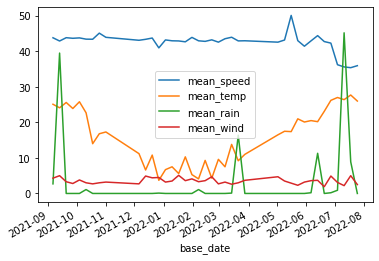

In [45]:
mon_mean[['mean_speed','mean_temp','mean_rain','mean_wind']].plot()

In [52]:
mon_mean.corr()

,mean_speed,mean_temp,mean_rain,mean_wind
mean_speed,1.000000,-0.341654,-0.343946,0.010913
mean_temp,-0.341654,1.000000,0.294475,-0.187098
mean_rain,-0.343946,0.294475,1.000000,0.019465
mean_wind,0.010913,-0.187098,0.019465,1.000000


<AxesSubplot:xlabel='base_date'>

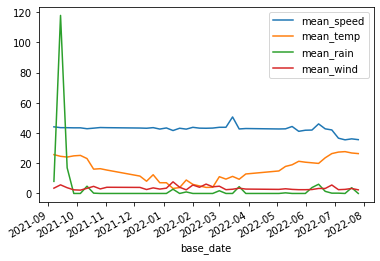

In [46]:
tue_mean[['mean_speed','mean_temp','mean_rain','mean_wind']].plot()

In [54]:
tue_mean.corr()

,mean_speed,mean_temp,mean_rain,mean_wind
mean_speed,1.000000,-0.418486,0.069020,0.133785
mean_temp,-0.418486,1.000000,0.221411,-0.372327
mean_rain,0.069020,0.221411,1.000000,0.288797
mean_wind,0.133785,-0.372327,0.288797,1.000000


<AxesSubplot:xlabel='base_date'>

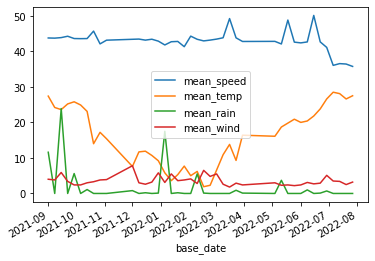

In [47]:
wed_mean[['mean_speed','mean_temp','mean_rain','mean_wind']].plot()

In [55]:
wed_mean.corr()

,mean_speed,mean_temp,mean_rain,mean_wind
mean_speed,1.000000,-0.274650,0.031249,-0.080966
mean_temp,-0.274650,1.000000,0.080594,-0.367178
mean_rain,0.031249,0.080594,1.000000,0.154036
mean_wind,-0.080966,-0.367178,0.154036,1.000000


<AxesSubplot:xlabel='base_date'>

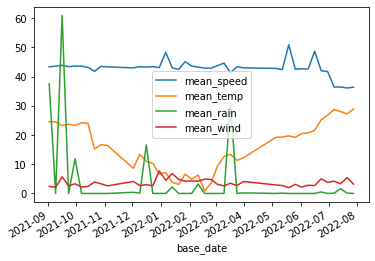

In [48]:
thu_mean[['mean_speed','mean_temp','mean_rain','mean_wind']].plot()

In [56]:
thu_mean.corr()

,mean_speed,mean_temp,mean_rain,mean_wind
mean_speed,1.000000,-0.367382,0.023785,-0.195467
mean_temp,-0.367382,1.000000,0.151623,-0.405274
mean_rain,0.023785,0.151623,1.000000,0.117491
mean_wind,-0.195467,-0.405274,0.117491,1.000000


<AxesSubplot:xlabel='base_date'>

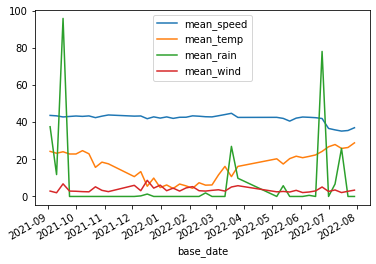

In [49]:
fri_mean[['mean_speed','mean_temp','mean_rain','mean_wind']].plot()

In [57]:
fri_mean.corr()

,mean_speed,mean_temp,mean_rain,mean_wind
mean_speed,1.000000,-0.476592,0.007920,0.152582
mean_temp,-0.476592,1.000000,0.283769,-0.433312
mean_rain,0.007920,0.283769,1.000000,0.319122
mean_wind,0.152582,-0.433312,0.319122,1.000000


<AxesSubplot:xlabel='base_date'>

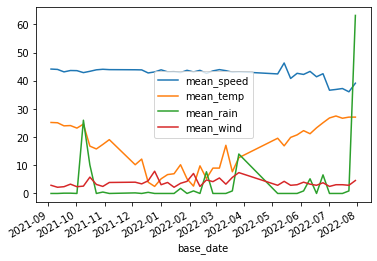

In [50]:
sat_mean[['mean_speed','mean_temp','mean_rain','mean_wind']].plot()

In [58]:
sat_mean.corr()

,mean_speed,mean_temp,mean_rain,mean_wind
mean_speed,1.000000,-0.485843,-0.197700,0.173228
mean_temp,-0.485843,1.000000,0.235426,-0.541739
mean_rain,-0.197700,0.235426,1.000000,0.164805
mean_wind,0.173228,-0.541739,0.164805,1.000000


<AxesSubplot:xlabel='base_date'>

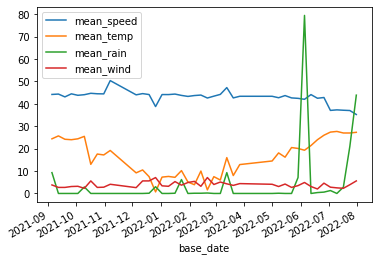

In [51]:
sun_mean[['mean_speed','mean_temp','mean_rain','mean_wind']].plot()

In [59]:
sun_mean.corr()

,mean_speed,mean_temp,mean_rain,mean_wind
mean_speed,1.000000,-0.326347,-0.319536,-0.002898
mean_temp,-0.326347,1.000000,0.223915,-0.591522
mean_rain,-0.319536,0.223915,1.000000,0.203891
mean_wind,-0.002898,-0.591522,0.203891,1.000000


- 처음 예상은 비가 오는 경우 속도가 줄어들 것이라고 예상했지만, 비교 결과 온도가 전반적으로 속도와 가장 큰 상관관계를 보여준다.
- 이는 두가지 경우떄문이라고 예상한다.
- 1. 기온이 높아 날씨가 좋으면 관광객이 많아 도로가 혼잡해지므로 속도가 줄어든다.
- 2. 비가 오면 관광객이 줄어들어 속도의 변화가 적다.